<a href="https://colab.research.google.com/github/comsa33/-_-_-/blob/main/n121-hypothesis-test/n121a-hypothesis-test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 1*

# 📝 Assignment

# 가설 검정

## 1. One-Sample T-test 연습

### 데이터 불러오기
- [서울시 가로수 데이터셋](https://data.seoul.go.kr/dataList/367/S/2/datasetView.do)을 사용합니다.

다음 링크를 참조하세요. 
<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt>


In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [6]:
import pandas as pd

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt'

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt', sep='\t', skiprows=1)

df.head()

,기간,자치구,노선수,수량,은행나무,양버즘나무,느티나무,왕벚나무,은단풍나무,메타세콰이어,회화나무,가죽나무,감나무,수양버들,튜울립나무,칠엽수,포플러,느릅나무,살구나무,무궁화,소나무,목련,이팝나무,기타
0,2019,서울시,"1,412","307,351","108,050","62,474","37,473","34,150",545,"5,171","7,816",52,871,32,948,"1,533",7,504,234,"2,374","4,539",378,"20,088","20,112"
1,2019,종로구,70,"7,329","4,072","1,071",619,421,-,1,140,1,-,8,-,17,-,-,-,-,239,-,711,29
2,2019,중구,48,"8,250","3,640",162,460,289,-,-,176,-,-,-,7,-,-,-,21,46,"2,162",-,470,817
3,2019,용산구,39,"7,835","4,444","1,422",373,262,-,-,37,-,74,-,13,16,-,-,39,-,51,126,198,780
4,2019,성동구,38,"8,120","1,090","2,401","1,975",602,29,48,325,33,146,-,-,1,3,59,-,-,53,-,709,646


In [7]:
df.dtypes

기간         int64
자치구       object
노선수       object
수량        object
은행나무      object
양버즘나무     object
느티나무      object
왕벚나무      object
은단풍나무     object
메타세콰이어    object
회화나무      object
가죽나무      object
감나무       object
수양버들      object
튜울립나무     object
칠엽수       object
포플러       object
느릅나무      object
살구나무      object
무궁화       object
소나무       object
목련        object
이팝나무      object
기타        object
dtype: object

### "서울시에는 구별로 평균 약 400 그루 정도의 `이팝나무`가 있다"라는 가설에 대해 가설검정을 시행하세요.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.
- 가설검정 결과의 pvalue 값을 `pv1`에 저장하세요. (`.pvalue` 사용)

In [8]:
new_df = df[(df['자치구'] != '서울시') & (df['자치구'] != '공원녹지사업소') & (df['자치구'] != '시설관리공단')]

In [9]:
df_tree1 = new_df['이팝나무'].apply(lambda x: int(x.replace(',', '')))
df_tree1.mean()

688.64

In [10]:
from scipy import stats

ts1, pv1 = stats.ttest_1samp(df_tree1, 400)
pv1

0.002470712850935819

### 이번에는 10개의 구를 샘플링하여, 위에 대한 가설검정을 다시 한번 시행해보세요.

- 단, 아래의 코드를 참조하여 sample을 위한 seed 는 123로 설정하세요.
- 가설검정 결과의 pvalue값을 `pv2`에 저장하세요


In [11]:
len(df_tree1)

25

In [12]:
import numpy as np
np.random.seed(123)

df_tree1_samp10 = np.random.choice(df_tree1, size = 10)
df_tree1_samp10

array([1280,  198,  198,  449,  184,  397,  142,  768,  470,  711])

In [13]:
ts2, pv2 = stats.ttest_1samp(df_tree1_samp10, 400)
pv2

0.49772576203804575

## 2. Two-Sample T-test 연습

### "서울시의 구별 평균 느티나무수와 왕벚나무의 수는 차이가 없다"라는 가설에 대해 가설검정을 시행하세요.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.
- 가설검정 결과의 pvalue를 `pv3`에 저장하세요

In [14]:
new_df2 = df[['자치구', '느티나무', '왕벚나무']]
new_df2 = new_df2[(df['자치구'] != '서울시') & (df['자치구'] != '공원녹지사업소') & (df['자치구'] != '시설관리공단')]

In [15]:
df_tree2 = new_df2['느티나무'].apply(lambda x: int(x.replace(',', '')))
df_tree3 = new_df2['왕벚나무'].apply(lambda x: int(x.replace(',', '')))


print(df_tree2.mean(), df_tree3.mean())

1415.12 1292.0


In [16]:
ts3, pv3 = stats.ttest_ind(df_tree2, df_tree3)
pv3

0.6455096880085703


### Two-Sample One-tailed test를 사용하여 **평균 느티나무수가 왕벚나무 수보다 크다**라는 가설에 대한 가설검정을 시행하세요.
- 해당 가설검정의 결과를 `ans`에 저장하세요.

이 때 `ans`가 가질 수 있는 값은 아래와 같습니다 :
1. "느티나무" ( 느티나무의 수가 통계적으로 유의하게 많은 경우 )
2. "왕벚나무" ( 왕벚나무의 수가 통계적으로 유의하게 많은 경우 )
3. "없음" (통계적으로 유의하지 않은 경우)

Two-Sample One-tailed test를 scipy에서 하는 방법은 아래의 링크를 참고 하세요  
참고 링크 : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [17]:
# 아래의 코드를 실행해주세요
!pip install scipy --upgrade

In [18]:
t_score, p_value = stats.ttest_ind(df_tree2, df_tree3, alternative='greater')

print(t_score, p_value)

0.4629256014492562 0.32275484400428517


In [19]:
if p_value <= 0.05:
    ans = '왕벚나무'
elif p_value > 0.05 and p_value <= 0.1:
    ans = '없음'
else:
    ans = '느티나무'

print(ans)

느티나무


## 🔥 **도전과제**
> 2문제 모두 하면 됩니다.



### 1. Compare mean for multiple-sample 
 
다음 링크를 참조하세요. <https://reneshbedre.github.io/blog/anova.html>

구별, 은행나무, 양버즘나무, 느티나무에 대해서 ANOVA Test를 실행하세요.

단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.

In [31]:
new_df3 = new_df[['은행나무', '양버즘나무', '느티나무']]
new_df3.head()

,은행나무,양버즘나무,느티나무
1,"4,072","1,071",619
2,"3,640",162,460
3,"4,444","1,422",373
4,"1,090","2,401","1,975"
5,"1,247","2,306","1,057"


In [32]:
df_melt = pd.melt(new_df3.reset_index(), id_vars='index', value_vars=['은행나무', '양버즘나무', '느티나무'])
df_melt['value'] = df_melt['value'].apply(lambda x: int(x.replace(',', '')))
df_melt.columns = ['index', 'treatments', 'value']

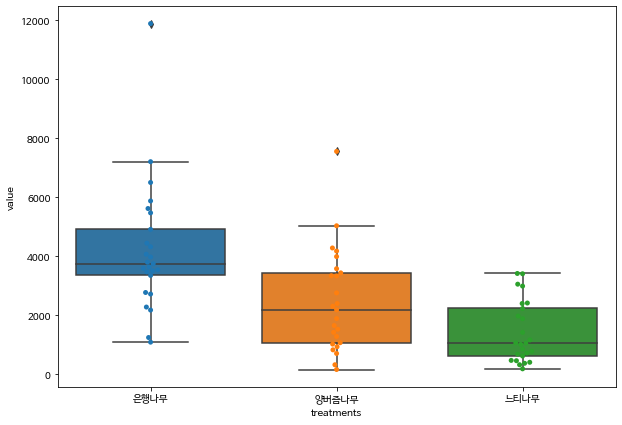

In [33]:
import seaborn as sns

plt.figure(figsize=(10,7))
ax = sns.boxplot(x='treatments', y='value', data=df_melt)
ax = sns.swarmplot(x='treatments', y='value', data=df_melt)
plt.show()

In [ ]:
new_df3 = new_df3.applymap(lambda x: int(x.replace(',', '')))

In [39]:
fvalue, pvalue = stats.f_oneway(new_df3['은행나무'], new_df3['양버즘나무'], new_df3['느티나무'])

print('데이터의 일원분산분석 결과 : F={0:.3f}, p={1:.9f}'.format(fvalue, pvalue))
if pvalue < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

데이터의 일원분산분석 결과 : F=17.006, p=0.000000894
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),9.990817e+07,2.0,17.00629,8.935183e-07
Residual,2.114920e+08,72.0,NaN,NaN


### 2. Sampling

- 세션 시간에 배웠던 4가지 sampling (Simple Random, Systematic, Stratified Random, Cluster) 방식을 구현해보세요.

- 이를 위한 데이터는 1 부터 100을 담은 numpy array이며, Sampling 해야 하는 수는 20개 입니다.

- Stratified Random Sampling을 위한 그룹을 나누는 기준은 1-10, 11-20, ... 과 같은 방식입니다.

- Cluster Sampling에서 그룹을 나누는 기준은 5로 나눴을때의 나머지 값입니다. (0,1,2,3,4)

In [77]:
np.random.seed(333)

data = np.arange(1, 101)
print(data)
print()

# 1. simple random sampling
data_simple_samp = np.random.choice(data, size=20)
print('1. simple random sampling : ',data_simple_samp)

# 2. systematic sampling
data_sys_samp = data[::5]
print('2. systematic sampling : ',data_sys_samp)

# 3. stratified random sampling
temp = [np.random.choice(data[i:i+10], size=int(20/10)) for i in range(0, len(data), 10)]
data_stran_samp = sum([[i[0], i[1]] for i in temp], [])
print('3. stratified random sampling : ', data_stran_samp)

# 4. cluster sampling
rems = [0, 1, 2, 3, 4]
data_new = []
for rem in rems:
    temp = [v for v in data if v%5 == rem]
    data_new.append(temp)
data_clu_samp = data_new[np.random.randint(0,9)]
print('4. cluster sampling : ', data_clu_samp)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

1. simple random sampling :  [13 78 36 52 47 61 84 30 72 24 93 55 27 63 13 21 10 24 38 73]
2. systematic sampling :  [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96]
3. stratified random sampling :  [9, 8, 14, 14, 24, 30, 34, 34, 48, 48, 52, 51, 69, 63, 78, 71, 82, 81, 99, 96]
4. cluster sampling :  [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88, 93, 98]
